# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
#Create the base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Build a partial query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

In [26]:
#Create empty lists to hold variables for each column of data
city_name = []
lat_list = []
long_list = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country_name = []
date = []

#Start the record counter and set counter for printing the results
record_counter = 0
set_counter = 1

print("Beginning Data Retrieval\n------------------------------")

#Loop through each city to request the data for the variables above
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat_list.append(response["coord"]["lat"])
        long_list.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country_name.append(response["sys"]["country"])
        date.append(response["dt"])
        
        if record_counter > 48:
            record_counter = 1
            set_counter += 1
            city_name.append(city)
        else:
            record_counter += 1
            city_name.append(city)
        
        print(f"Processing Record {record_counter}  of Set {set_counter}  | {city}")
    except Exception:
        print("City not found. Skipping...")
        
print("------------------------------\nData Retrieval Complete\n------------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1  of Set 1  | albany
Processing Record 2  of Set 1  | faanui
City not found. Skipping...
Processing Record 3  of Set 1  | odessa
Processing Record 4  of Set 1  | college
Processing Record 5  of Set 1  | busselton
Processing Record 6  of Set 1  | rio grande
Processing Record 7  of Set 1  | shagonar
Processing Record 8  of Set 1  | cape town
Processing Record 9  of Set 1  | qaanaaq
Processing Record 10  of Set 1  | hermanus
Processing Record 11  of Set 1  | erenhot
Processing Record 12  of Set 1  | hay river
Processing Record 13  of Set 1  | tateyama
Processing Record 14  of Set 1  | barrow
City not found. Skipping...
Processing Record 15  of Set 1  | kodiak
City not found. Skipping...
Processing Record 16  of Set 1  | yellowknife
Processing Record 17  of Set 1  | lazaro cardenas
City not found. Skipping...
Processing Record 18  of Set 1  | provideniya
Processing Record 19  of Set 1  | leua
Processing Record 20  o

Processing Record 31  of Set 4  | constitucion
Processing Record 32  of Set 4  | trairi
Processing Record 33  of Set 4  | wattegama
Processing Record 34  of Set 4  | road town
Processing Record 35  of Set 4  | vostok
City not found. Skipping...
Processing Record 36  of Set 4  | saint-augustin
Processing Record 37  of Set 4  | saskylakh
Processing Record 38  of Set 4  | andrews
City not found. Skipping...
Processing Record 39  of Set 4  | ossora
Processing Record 40  of Set 4  | saldanha
Processing Record 41  of Set 4  | revelstoke
Processing Record 42  of Set 4  | puerto ayacucho
Processing Record 43  of Set 4  | shimoda
Processing Record 44  of Set 4  | alice springs
Processing Record 45  of Set 4  | los llanos de aridane
City not found. Skipping...
Processing Record 46  of Set 4  | sabang
Processing Record 47  of Set 4  | mahebourg
City not found. Skipping...
Processing Record 48  of Set 4  | sarankhola
Processing Record 49  of Set 4  | pacific grove
Processing Record 1  of Set 5  | 

Processing Record 17  of Set 8  | visby
Processing Record 18  of Set 8  | krasnovishersk
Processing Record 19  of Set 8  | bengkulu
Processing Record 20  of Set 8  | bambous virieux
Processing Record 21  of Set 8  | manturovo
Processing Record 22  of Set 8  | nishihara
Processing Record 23  of Set 8  | aklavik
Processing Record 24  of Set 8  | pundaguitan
Processing Record 25  of Set 8  | mahajanga
Processing Record 26  of Set 8  | coquimbo
Processing Record 27  of Set 8  | moose factory
Processing Record 28  of Set 8  | onega
Processing Record 29  of Set 8  | hamilton
Processing Record 30  of Set 8  | yuxia
Processing Record 31  of Set 8  | west plains
Processing Record 32  of Set 8  | disna
Processing Record 33  of Set 8  | sao sebastiao
Processing Record 34  of Set 8  | lavrentiya
Processing Record 35  of Set 8  | bizhbulyak
Processing Record 36  of Set 8  | dandong
Processing Record 37  of Set 8  | sola
Processing Record 38  of Set 8  | alyangula
Processing Record 39  of Set 8  | l

Processing Record 49  of Set 11  | naze
Processing Record 1  of Set 12  | iralaya
Processing Record 2  of Set 12  | eureka
Processing Record 3  of Set 12  | hovd
Processing Record 4  of Set 12  | kavieng
Processing Record 5  of Set 12  | tank
Processing Record 6  of Set 12  | tucuman
Processing Record 7  of Set 12  | formosa
Processing Record 8  of Set 12  | camaqua
Processing Record 9  of Set 12  | san andres
Processing Record 10  of Set 12  | dingle
Processing Record 11  of Set 12  | bintulu
Processing Record 12  of Set 12  | coahuayana
Processing Record 13  of Set 12  | torbay
Processing Record 14  of Set 12  | bandiagara
Processing Record 15  of Set 12  | kirakira
Processing Record 16  of Set 12  | half moon bay
Processing Record 17  of Set 12  | jalu
Processing Record 18  of Set 12  | the valley
Processing Record 19  of Set 12  | el alto
Processing Record 20  of Set 12  | ravar
Processing Record 21  of Set 12  | nagapattinam
Processing Record 22  of Set 12  | iquique
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
#Create a dictionary to name our columns and hold the results from the API call
weather_data = {"City": city_name,
               "Lat": lat_list,
               "Lng": long_list,
               "Max Temp": max_temp,
               "Humidity": humidity,
               "Cloudiness": cloudiness,
               "Wind Speed": wind_speed,
               "Country": country_name,
               "Date": date}

#Create a dataframe with the results from the dictionary
weather_df = pd.DataFrame(weather_data)

#Export the data into a CSV
weather_df.to_csv(output_data_file)

weather_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,39.99,68,82,3.00,US,1609200607
1,faanui,-16.48,-151.75,80.92,69,10,7.61,PF,1609200836
2,odessa,46.48,30.73,46.40,100,90,15.66,UA,1609200836
3,college,64.86,-147.80,12.20,78,75,3.36,US,1609200837
4,busselton,-33.65,115.33,72.00,52,80,3.00,AU,1609200837
5,rio grande,-32.03,-52.10,72.00,82,6,11.90,BR,1609200679
6,shagonar,51.53,92.80,-26.75,82,89,3.65,RU,1609200837
7,cape town,-33.93,18.42,66.00,77,20,10.29,ZA,1609200601
8,qaanaaq,77.48,-69.36,22.69,89,100,10.13,GL,1609200823
9,hermanus,-34.42,19.23,64.99,82,69,2.10,ZA,1609200837


In [30]:
#Collect a summary of all numeric data
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,20.289914,16.533014,49.121986,75.142123,54.301370,8.197277,1.609201e+09
std,33.161071,89.405268,31.834273,16.668044,38.919166,6.294376,5.575602e+01
min,-54.800000,-175.200000,-48.050000,13.000000,0.000000,0.250000,1.609201e+09
25%,-8.950000,-61.445000,31.545000,68.000000,10.000000,3.360000,1.609201e+09
50%,24.855000,21.490000,59.790000,79.000000,71.500000,6.545000,1.609201e+09
75%,47.842500,92.762500,75.217500,87.000000,90.000000,11.410000,1.609201e+09
max,78.220000,178.420000,93.200000,100.000000,100.000000,40.780000,1.609201e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
# Get the indices of cities that have humidity over 100%
#We will collect a summary of numeric data related to humidity 
check_humidity = weather_df["Humidity"].describe()
check_humidity

#The max of value of humidity is 100%, so we can skip this step

count    584.000000
mean      75.142123
std       16.668044
min       13.000000
25%       68.000000
50%       79.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot
### Analysis
- We can see that the cities in the southern hemisphere, or cities with a negative latitude value, are clustered and have similar max temperatures between 60 to 90 degrees Farenheit.
- As we move further above the equator to cities in the northern hemisphere, or cities with a positive latitude value, the relationship becomes negative. The higher the latitude, the lower the maximum temperature. 

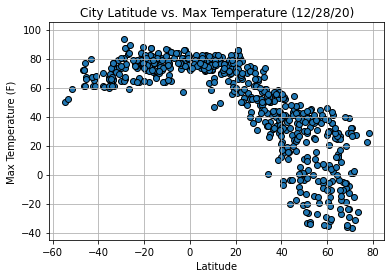

In [81]:
#Create a scatter plot to show the relationship between Latitude and Max Temperature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolors="black")
plt.grid(True)
plt.ylim(-45,105)
plt.title("City Latitude vs. Max Temperature (12/28/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot
### Analysis
- There doesn't seem to be an observable strong correlation between latitude and humidity. 
- Cities in both the northern and southern hemispheres have humidity values that are mostly greater than 60%.  

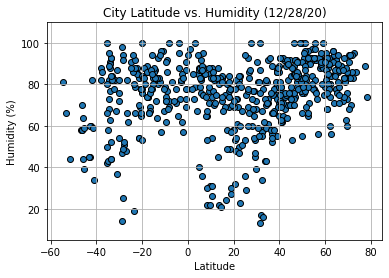

In [84]:
#Create a scatter plot to show the relationship between Latitude and Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors="black")
plt.grid(True)
plt.ylim(5,110)
plt.title("City Latitude vs. Humidity (12/28/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot
### Analysis
- We  do not see an observable strong correlation between latitude and cloudiness. 
- There are a significant amount of cities in both hemispheres that have cloudiness percentages at 0% and 100%. 

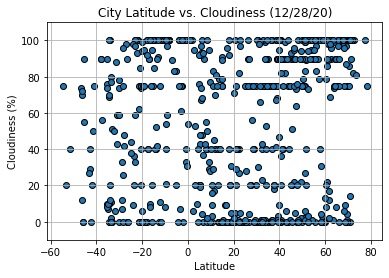

In [87]:
#Create a scatter plot to show the relationship between Latitude and Cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors="black")
plt.grid(True)
plt.ylim(-10,110)
plt.title("City Latitude vs. Cloudiness (12/28/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

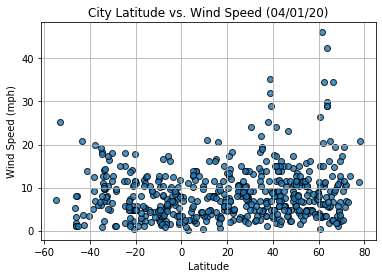

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


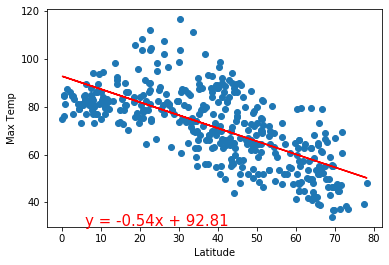

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


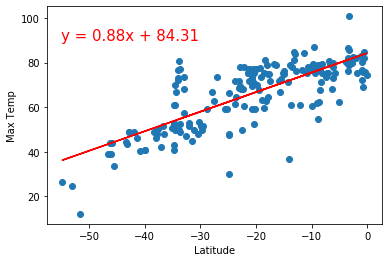

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


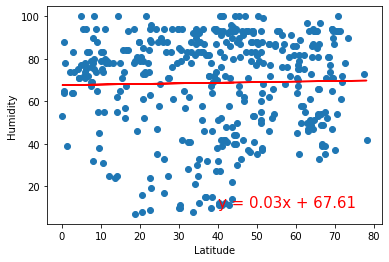

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


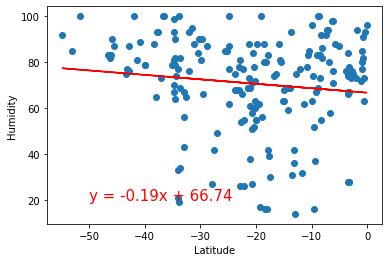

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


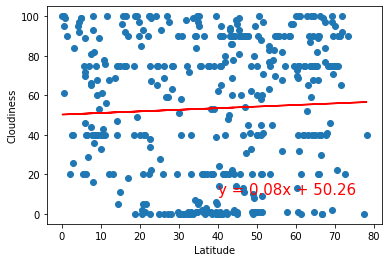

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


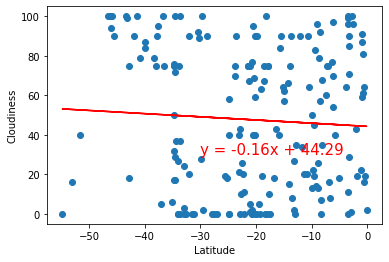

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


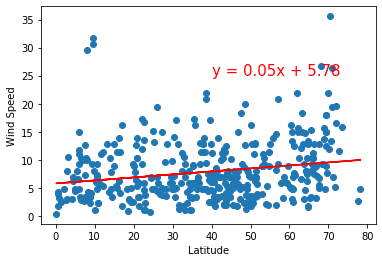

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


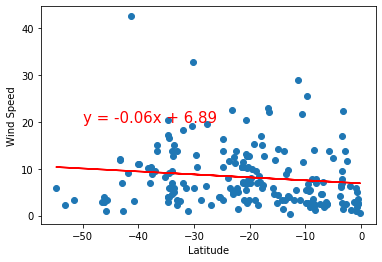